In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [21]:
cnn.add(tf.keras.layers.Flatten())

In [23]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [27]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [29]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1975s 899ms/step - loss: 1.8301 - accuracy: 0.4678 - val_loss: 0.8455 - val_accuracy: 0.7369
Epoch 2/10
2197/2197 [==============================] - 1913s 870ms/step - loss: 0.8521 - accuracy: 0.7331 - val_loss: 0.5182 - val_accuracy: 0.8407
Epoch 3/10
2197/2197 [==============================] - 1239s 564ms/step - loss: 0.5964 - accuracy: 0.8090 - val_loss: 0.4069 - val_accuracy: 0.8668
Epoch 4/10
2197/2197 [==============================] - 1054s 480ms/step - loss: 0.4577 - accuracy: 0.8534 - val_loss: 0.2932 - val_accuracy: 0.9079
Epoch 5/10
2197/2197 [==============================] - 1058s 481ms/step - loss: 0.3715 - accuracy: 0.8800 - val_loss: 0.2695 - val_accuracy: 0.9110
Epoch 6/10
2197/2197 [==============================] - 1075s 489ms/step - loss: 0.3113 - accuracy: 0.8990 - val_loss: 0.2569 - val_accuracy: 0.9169
Epoch 7/10
2197/2197 [==============================] - 1081s 492ms/step - loss: 0.2670 - accuracy: 0.9126

In [37]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 491s 223ms/step - loss: 0.1002 - accuracy: 0.9660
Training accuracy: 0.9660146236419678


In [39]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 152s 275ms/step - loss: 0.1607 - accuracy: 0.9462
Validation accuracy: 0.9462212324142456


In [41]:
cnn.save('trained_plant_disease_model.keras')

In [43]:
training_history.history #Return Dictionary of history

{'loss': [1.8300758600234985,
  0.8521450757980347,
  0.5963647365570068,
  0.4576694369316101,
  0.3715486526489258,
  0.31134310364723206,
  0.2669859528541565,
  0.23209163546562195,
  0.20760464668273926,
  0.18192167580127716],
 'accuracy': [0.46781420707702637,
  0.7331246733665466,
  0.8089764714241028,
  0.8533750772476196,
  0.8799914717674255,
  0.8990397453308105,
  0.9125542640686035,
  0.9231951236724854,
  0.9305640459060669,
  0.9395689368247986],
 'val_loss': [0.8455390930175781,
  0.5182345509529114,
  0.4069303274154663,
  0.2932041585445404,
  0.2694864273071289,
  0.25693777203559875,
  0.22825796902179718,
  0.16994106769561768,
  0.15559273958206177,
  0.16067858040332794],
 'val_accuracy': [0.736854076385498,
  0.8406555652618408,
  0.866776704788208,
  0.9078648090362549,
  0.9109947681427002,
  0.9168563485145569,
  0.9243683218955994,
  0.9430343508720398,
  0.9487821459770203,
  0.9462212324142456]}

In [45]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [47]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


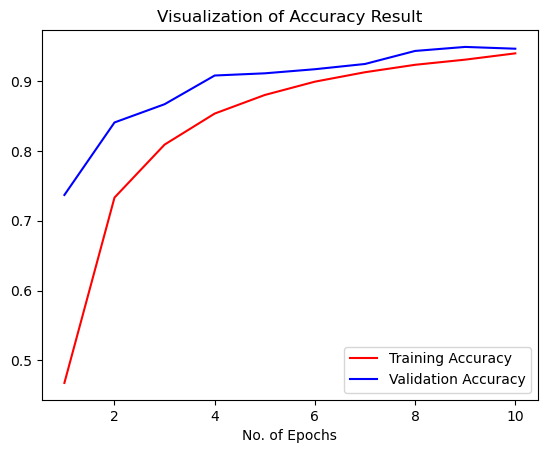

In [49]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [51]:
class_name = validation_set.class_names

In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 255s 14ms/step


In [59]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [61]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [65]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.77      0.99      0.87       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.97       440
                                   Apple___healthy       0.95      0.90      0.93       502
                               Blueberry___healthy       0.96      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.94      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

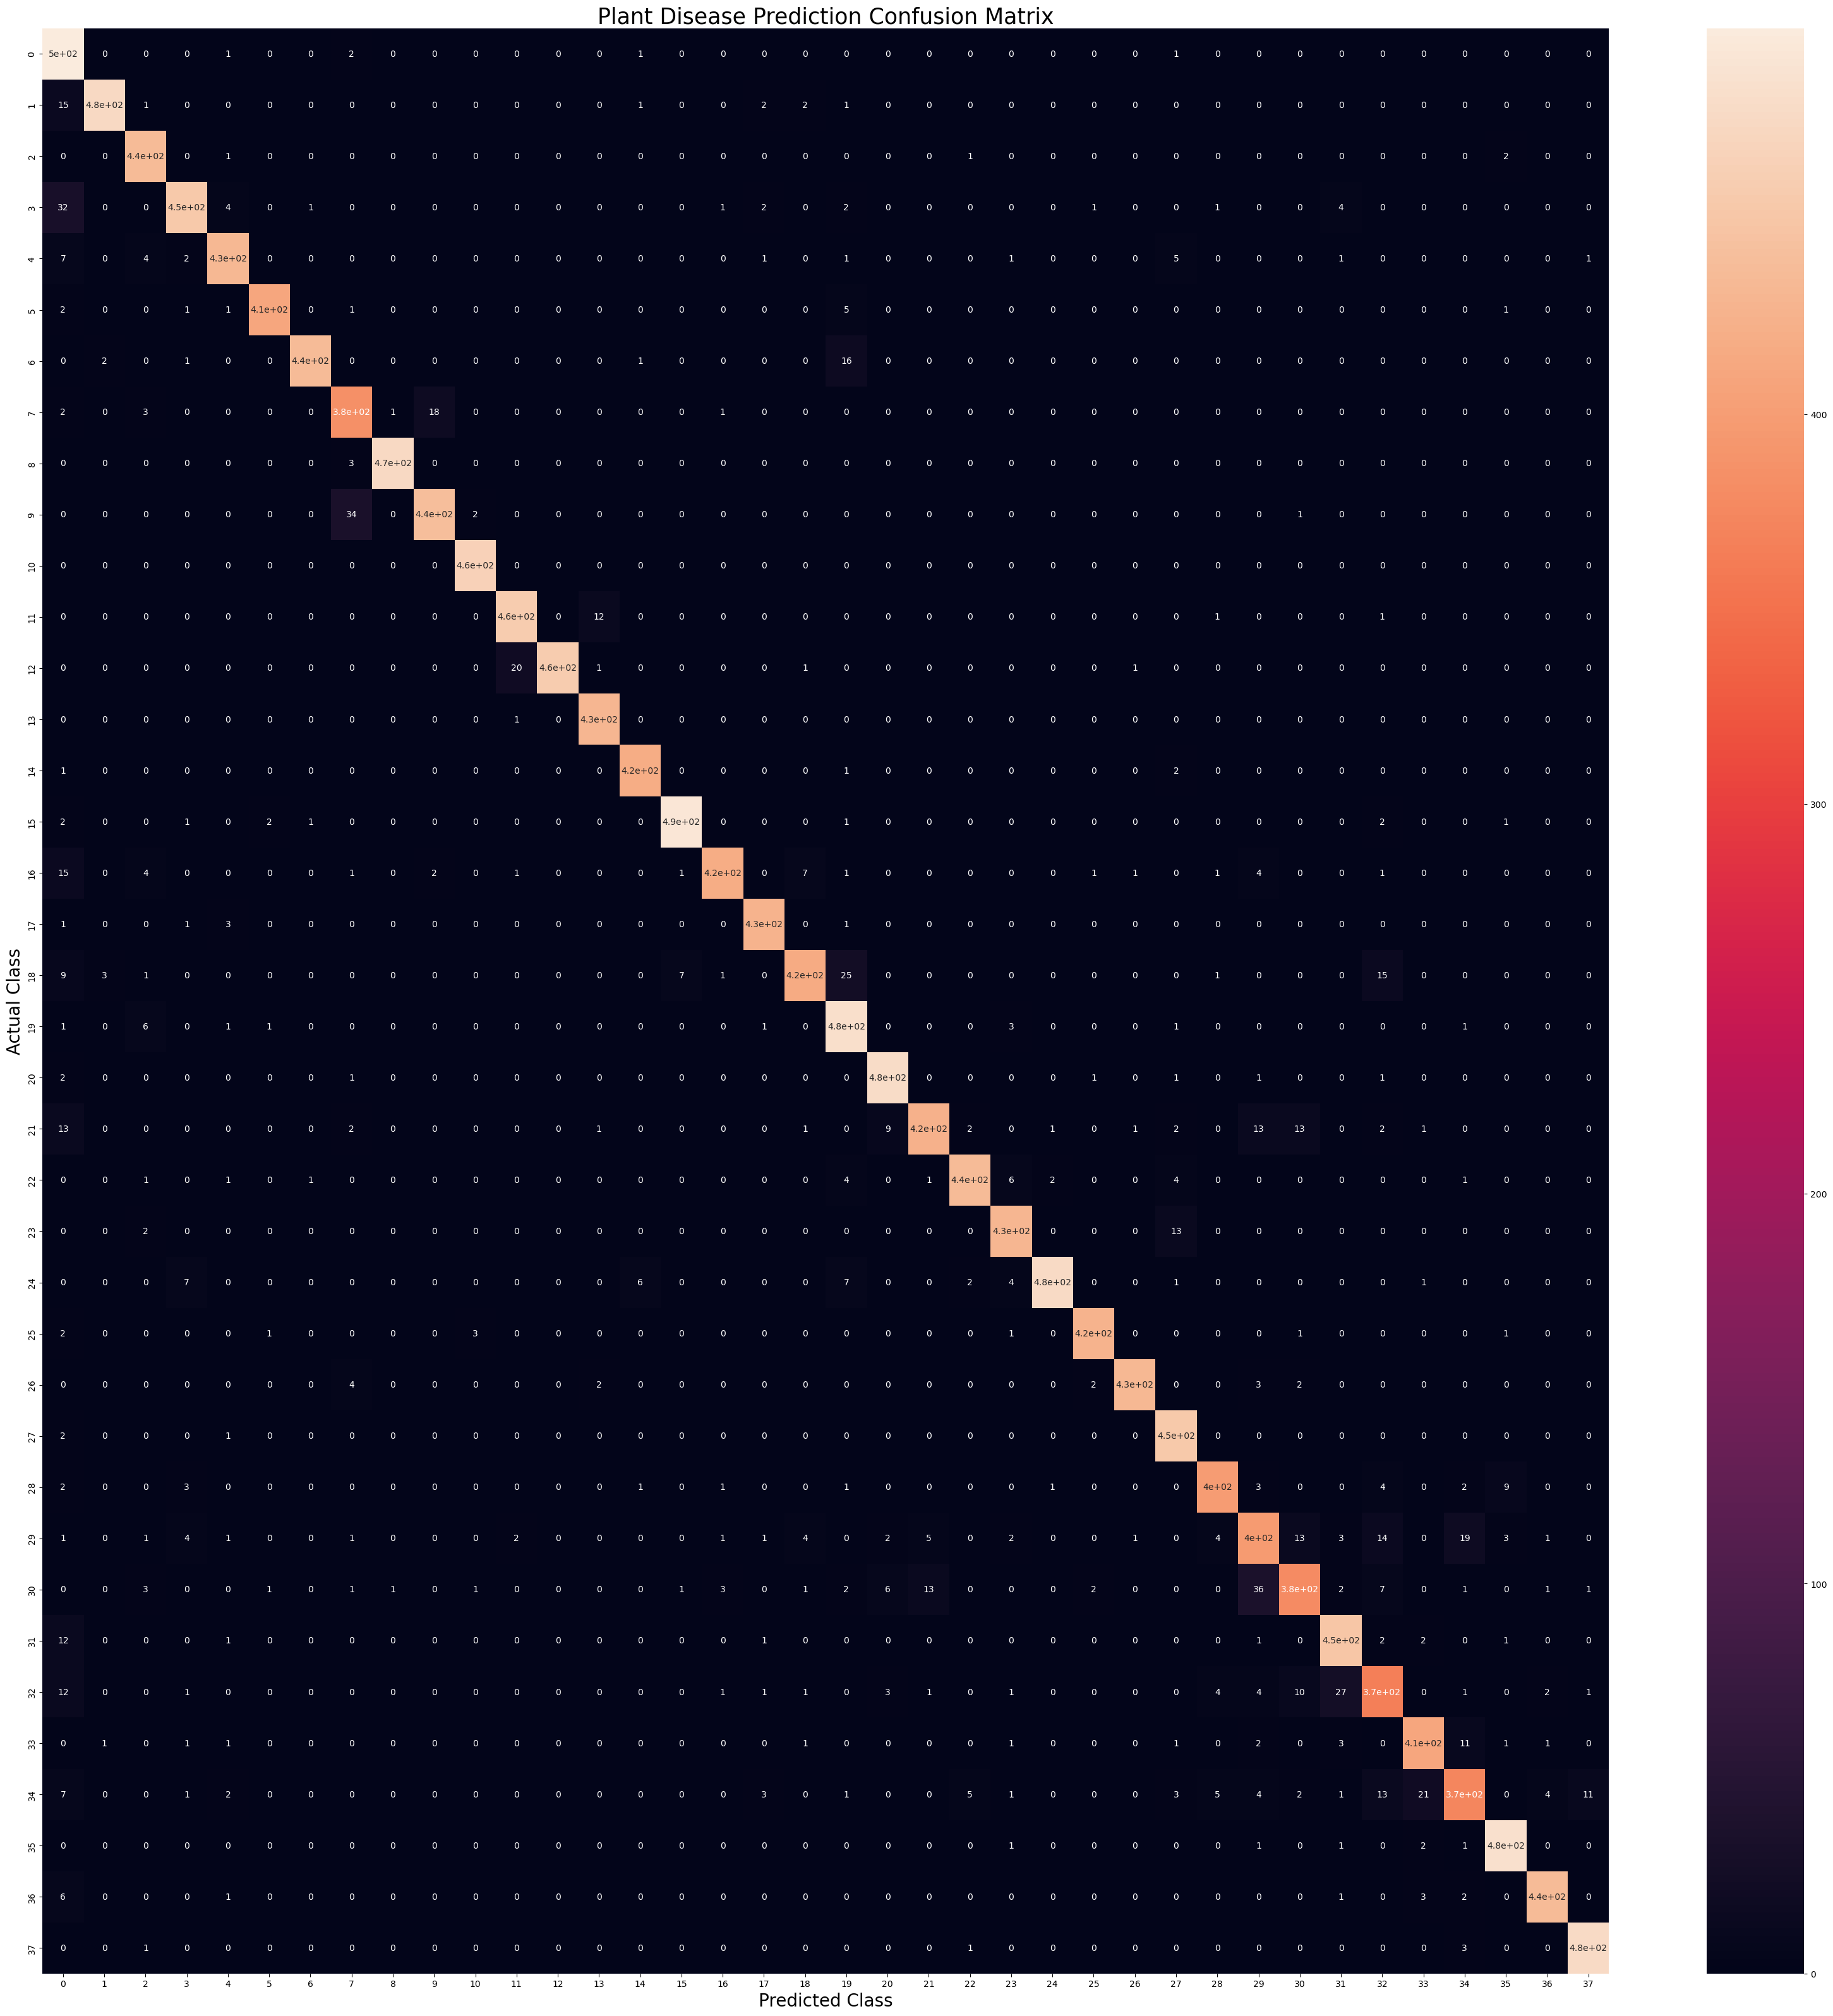

In [71]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()